Import data

In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.backends.backend_pdf import PdfPages
import warnings
warnings.filterwarnings('ignore')
# import ray
import matplotlib as mpl

from tqdm import tqdm


c:\Users\Niell Lab\.conda\envs\DLC-GPU2\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Niell Lab\.conda\envs\DLC-GPU2\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
c:\Users\Niell Lab\.conda\envs\DLC-GPU2\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df = pd.read_hdf(r"T:\\freely_moving_ephys\ephys_recordings\020422\J577RT\hf1_wn\020422_J577RT_control_Rig2_hf1_wn_ephys_props.h5")
#load h5 file from sbc path as a string, only works for local files  
#must put r before string to read it in if it has 


In [3]:
#show data frame 
df

,Amplitude,ContamPct,KSLabel,amp,ch,depth,fr,group,n_spikes,sh,...,hf1_wn_glm_cc,hf1_wn_spike_rate_vs_spd_cent,hf1_wn_spike_rate_vs_spd_tuning,hf1_wn_spike_rate_vs_spd_err,hf1_wn_spike_rate_vs_phi_cent,hf1_wn_spike_rate_vs_phi_tuning,hf1_wn_spike_rate_vs_phi_err,hf1_wn_lfp_power_profiles,hf1_wn_lfp_layer5_centers,session
7,950.9,4.0,good,81.667793,15,400,9.472997,good,50025,0,...,"[0.18469421651495774, 0.19274016263519783, 0.1...","[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[16.569278683068116, 15.897595727034323, 15.61...","[0.08167057539840716, 0.15326095084334465, 0.2...","[-26.666666666666664, -20.0, -13.3333333333333...","[nan, nan, 4.836106666982345, 16.2049618766531...","[nan, nan, 2.1055250335637856, 0.2416033375244...","[[0.35511475487857774, 0.36220217276287275, 0....","[26, 23, 16, 12]",020422_J577RT_control_Rig2
11,1435.4,1.3,good,87.078949,18,325,8.990683,good,47478,0,...,"[0.32645692735492443, 0.28181733299383566, 0.2...","[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[13.653435605294343, 13.175724629012262, 14.15...","[0.07251558547677701, 0.1335791520550182, 0.26...","[-26.666666666666664, -20.0, -13.3333333333333...","[nan, nan, 6.387066667897727, 18.0367095308600...","[nan, nan, 3.1949683335883887, 0.2407469223633...","[[0.35511475487857774, 0.36220217276287275, 0....","[26, 23, 16, 12]",020422_J577RT_control_Rig2
12,1010.5,3.0,good,65.408348,19,300,4.887896,good,25812,0,...,"[0.03418198390302537, 0.2600041987940868, 0.26...","[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[0.5090610931328422, 0.6404173293927131, 0.379...","[0.014967219477096314, 0.03095250118325975, 0....","[-26.666666666666664, -20.0, -13.3333333333333...","[nan, nan, 0.0, 0.6308125700779359, 0.43078072...","[nan, nan, 0.0, 0.04982557069544655, 0.0163455...","[[0.35511475487857774, 0.36220217276287275, 0....","[26, 23, 16, 12]",020422_J577RT_control_Rig2
14,726.2,0.0,mua,47.357906,19,300,0.127822,good,675,0,...,"[0.040347464920136064, 0.1091478471222682, 0.2...","[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[0.11139909368412862, 0.09277317508359885, 0.0...","[0.007312889662933168, 0.011997470538953899, 0...","[-26.666666666666664, -20.0, -13.3333333333333...","[nan, nan, 0.0, 0.15257497786947077, 0.1052431...","[nan, nan, 0.0, 0.024475565908120726, 0.007971...","[[0.35511475487857774, 0.36220217276287275, 0....","[26, 23, 16, 12]",020422_J577RT_control_Rig2
15,1288.4,0.0,good,95.726463,19,300,0.647819,good,3421,0,...,"[0.17271497048567147, 0.21465554078690793, 0.1...","[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[0.06582136317611963, 0.08982456973837007, 0.0...","[0.005353603912646624, 0.011702630475195885, 0...","[-26.666666666666664, -20.0, -13.3333333333333...","[nan, nan, 0.0, 0.11596618471110275, 0.0474074...","[nan, nan, 0.0, 0.021053623546616513, 0.005326...","[[0.35511475487857774, 0.36220217276287275, 0....","[26, 23, 16, 12]",020422_J577RT_control_Rig2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,1438.8,7.5,good,78.571480,124,75,0.460158,good,2430,0,...,"[nan, nan, nan, nan, nan]","[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[0.023069046518596925, 0.01839501483713919, 0....","[0.003177416275858139, 0.005211202334028725, 0...","[-26.666666666666664, -20.0, -13.3333333333333...","[nan, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[nan, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[[0.35511475487857774, 0.36220217276287275, 0....","[26, 23, 16, 12]",020422_J577RT_control_Rig2
452,2357.1,0.0,good,115.949341,125,50,0.265111,good,1400,0,...,"[nan, nan, nan, nan, nan]","[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[0.005747156200929926, 0.0, 0.0, 0.0, 0.0]","[0.0015978668663196463, 0.0, 0.0, 0.0, 0.0]","[-26.666666666666664, -20.0, -13.3333333333333...","[nan, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[nan, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[[0.35511475487857774, 0.36220217276287275, 0....","[26, 23, 16, 12]",020422_J577RT_control_Rig2
453,2524.1,0.0,goo

In [4]:
#show contrast response values 
crf = df["hf1_wn_crf_tuning"]
crf.head()

7     [18.689537653737272, 17.494171988949216, 17.31...
11    [10.679619108580928, 10.890641824742417, 13.01...
12    [0.20595225409545073, 0.23964911533167588, 0.2...
14    [0.007245235655478621, 0.0, 0.057455141241999,...
15    [0.023010809425795045, 0.006010488170570784, 0...
Name: hf1_wn_crf_tuning, dtype: object

7      [18.689537653737272, 17.494171988949216, 17.31...
11     [10.679619108580928, 10.890641824742417, 13.01...
12     [0.20595225409545073, 0.23964911533167588, 0.2...
14     [0.007245235655478621, 0.0, 0.057455141241999,...
15     [0.023010809425795045, 0.006010488170570784, 0...
                             ...                        
449    [0.015480020491420204, 0.0, 0.0, 0.0, 0.0, 0.0...
452    [0.008143084015798469, 0.0, 0.0, 0.0, 0.0, 0.0...
453    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
456    [0.05272894466758369, 0.0, 0.0, 0.0, 0.0048267...
459    [0.33536787910301796, 0.1434851417516793, 0.22...
Name: hf1_wn_crf_tuning, Length: 130, dtype: object


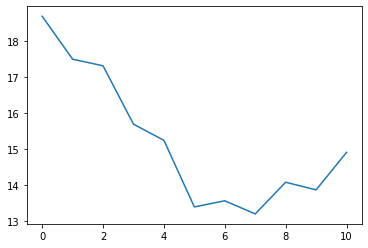

In [5]:
#print all root level object names aka keys
#these are either group or data set names


#to index into contrast response function (hf1_wn_crf_tuning) object name/key
#crf = list(df.keys)[0]
#print(df.keys())

#print out CRF column 
print(df["hf1_wn_crf_tuning"])



#plot cell 7 contrast response function
example_crf = df.loc[7,"hf1_wn_crf_tuning"]
plt.plot(example_crf)
plt.show()



Example cell 7 calculate sbc value. If positive then cell is SBC, if neg then it is typical positive contrast response

In [6]:
#identify suppressed-by-contrast cells
#first value-last value if positive then sbc 
singleunit_sbc_values = example_crf[0] - example_crf[-1]

print(singleunit_sbc_values)
    

3.787410455886512


Identify sbcs from whole experimental data set using for loop

In [7]:
#create new column for crf values 
df['crf_fr'] = df['hf1_wn_crf_tuning'][0] - df['hf1_wn_crf_tuning'][-1]
    


KeyError: 0

In [ ]:
crf

7      [18.689537653737272, 17.494171988949216, 17.31...
11     [10.679619108580928, 10.890641824742417, 13.01...
12     [0.20595225409545073, 0.23964911533167588, 0.2...
14     [0.007245235655478621, 0.0, 0.057455141241999,...
15     [0.023010809425795045, 0.006010488170570784, 0...
                             ...                        
449    [0.015480020491420204, 0.0, 0.0, 0.0, 0.0, 0.0...
452    [0.008143084015798469, 0.0, 0.0, 0.0, 0.0, 0.0...
453    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
456    [0.05272894466758369, 0.0, 0.0, 0.0, 0.0048267...
459    [0.33536787910301796, 0.1434851417516793, 0.22...
Name: hf1_wn_crf_tuning, Length: 130, dtype: object

In [ ]:
#insert blank dataframe column
df.insert(44, "CRF difference value", "")

#have two additional blank columns in data frame "CRF Difference" and "CRF difference values"

Trying to find value of the CRF difference. We need to subtract first value from last value in crf (if pos than SBC)

In [ ]:
crf_difference = first_crfvalue - last_crfvalue #if postive than sbc 
crf_difference
#the issue is it is only taking the first row of crf. want the first and last values of all rows in crf 

array([18.35416977, 17.35068685, 17.08757616, 15.46558756, 15.0037284 ,
       13.10177024, 13.1123795 , 12.98781297, 13.8075934 , 13.59203856,
       14.51089732])

In [17]:
#get first value of each row in crf
crf_first_value = [] #create variable name for for loop results to be saved out as
for row in crf: 
     crf_first_value.append(row[0])   #use append to save values


In [16]:
crf_first_value

[18.689537653737272,
 10.679619108580928,
 0.20595225409545073,
 0.007245235655478621,
 0.023010809425795045,
 0.0,
 0.016072284837364472,
 0.04944293033181812,
 0.01541014344213715,
 0.006924641392453967,
 0.12014923155722432,
 0.053182581966126914,
 3.081524846311443,
 0.16486552254748332,
 7.946781147478139,
 7.967961168000865,
 0.37871777664306344,
 0.22487879097966845,
 0.23191157786521507,
 2.0857504098344766,
 0.04811055327679047,
 0.23127407786259874,
 0.3863393954834181,
 17.124898207006336,
 4.300801280726047,
 0.6999515368681769,
 0.5421017930193754,
 1.0446778688722484,
 0.521890163955309,
 0.11533355532937395,
 0.03587628073859568,
 12.33394462092965,
 5.600188883179897,
 1.5298874999753709,
 0.6776052766386016,
 0.7050917008033084,
 22.91870619870392,
 0.3508971823689584,
 0.015477715163588026,
 0.8393415471172048,
 0.13427832992107383,
 3.1790704405978962,
 17.291435092167347,
 0.17827863729621035,
 0.10087981557308874,
 0.24552899589675523,
 3.47460061477383,
 1.0092973

In [18]:
#get first value of each row in crf
crf_last_value = [] #create variable name for for loop results to be saved out as
for row in crf: 
  crf_last_value.append(row[-1])   #use append to save valuescrf_last

In [21]:
crf_sbc_value = list() #initiate new empty list called crf_sbc_value which will hold the subtracted values 
for item1, item2 in zip(crf_last_value, crf_first_value): #zip is ideal function to find difference between two lists element by element 
     crf_sbc_value.append(item1 - item2) #assign the difference between to items to item and append it to the crf_sbc_value list

print(crf_sbc_value)

[-3.787410455886512, 6.377762004124273, 0.6057641607356941, 0.12048711325107893, 0.07850464386714055, 0.033017513735223825, 0.17688300363367215, 0.026054185053278105, 0.032519801615431804, 0.07429225421069098, 0.2121561942674636, 0.16083685484762014, 2.728235387233533, 0.7896175818548814, -7.311807246394697, 26.46750098857706, 0.48693270411304973, -0.18531107119832238, 0.26191630673419763, 5.764683106678959, 0.03138120496911755, -0.03204138555168523, -0.052334999868267174, -4.125635020211281, -0.09837442639642369, 0.07492360050893787, 0.40850019875580634, -0.33034414634462306, -0.2075057546194179, 0.023451815544778126, 0.03612159013519299, -3.4890372032988157, 1.732333163551381, 0.04576236259774502, -0.07325053762455647, -0.13196608266476717, -8.663720827884253, 0.10670103191637809, 0.39777516947331143, 1.5261740435509796, 2.724555255284108, -1.8504854131374686, 25.355482902308587, 0.3617113352262495, 3.905384607456931, -0.06118861127492753, 0.9804400445937476, 1.178127457885664, -0.69